In [1]:
import requests
import xml.etree.ElementTree as ET
import pprint
import matplotlib.pyplot as plt
import numpy as np
import BondGraphTools as bgt
from copy import copy, deepcopy

from ipynb.fs.full.Functions import GetCell,BG_Components,CBR_sorting, Index_C, CM_Creation
from ipynb.fs.full.Functions import Whole_CM, BondsConnection, combineDict,Get_Boundary


In [2]:
def main(fileName,modelName,*connections):

    # Importing all the required information from the cellml file via "GetCell" function
    [modelNum, subName, elements, init_vals]=GetCell(fileName)
    
    # Generating all the BG components via the "BG_Components" function
    [C,C1,C2,R,R1,R2,L,L1,L2,zero_junc_a,zero_junc_b,zero_junc_c,one_junc_a,one_junc_b,one_junc_c,x0_value,x1_value,x2_value,x3_value,x4_value,x5_value]=BG_Components(modelNum, elements,init_vals)
    
    # Creating and sorting the connectivity_bonds_row for later connecting the elements in the Connectivity Matrix
    [connectivity_bonds_column,connectivity_bonds_row]=CBR_sorting(C,C1,C2,R,R1,R2,L,L1,L2,zero_junc_a,zero_junc_b,zero_junc_c,one_junc_a,one_junc_b,one_junc_c)
         
    # Defining the BG model and adding all the components to the model
    model=bgt.new(name=modelName)
    bgt.add(model,C,C1,C2,R,R1,R2,L,L1,L2,zero_junc_a,zero_junc_b,zero_junc_c,one_junc_a,one_junc_b,one_junc_c)
       
    # In the following codes we get each 4 input *connections as distinct inputs and create a list of the indices which ...
    # need to be connected together
    [Con_Mod,Port_Mod]=Index_C(modelNum,subName,*connections)
        
    # Adding the connectivity matrix of each sub-system to the whole connectivity matrix
    connectivity_matrix_1=CM_Creation(modelNum)
    
    # Adding the required number of "1"s to the whole connectivity matrix based on the recognized connections
    Connectivity_Matrix=Whole_CM(Con_Mod,Port_Mod,connectivity_bonds_row,connectivity_matrix_1)

    # Creating the bonds between the BG model components based on the whole connectivity matrix
    bonds=BondsConnection(Connectivity_Matrix,connectivity_bonds_row,connectivity_bonds_column)
    
    # Combining all the initial conditions of the system
    x_0=combineDict(x0_value,x1_value,x2_value,x3_value,x4_value,x5_value)
    
    model=Get_Boundary(modelNum,subName,bonds,model)
    
    return [model,x_0]

In [8]:
[m,x_0]=main('branching_vessel_ex.cellml','Four_branching_vessels','main_1','C1','main_2','C','main_1','C2','main_3','C', 'main_2','C1','main_4','C')

Enter value for Se in model main_1: 9000000
Enter value for Sf2 in model main_2: 7000000
Enter value for Sf1 in model main_3: 7000000
Enter value for Sf2 in model main_3: 7000000
Enter value for Sf1 in model main_4: 7000000
Enter value for Sf2 in model main_4: 7000000


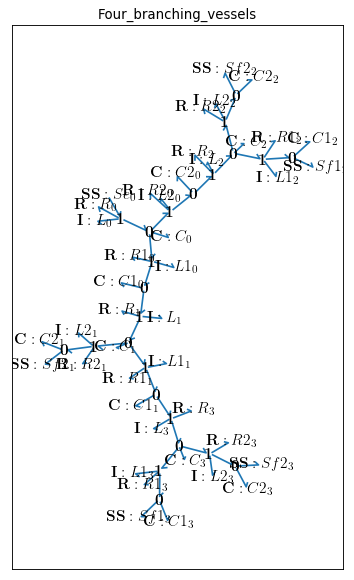

In [9]:
bgt.draw(m)

In [5]:
timespan=[0,12.5]

In [6]:
t, x = bgt.simulate(m, timespan=timespan, x0=x_0)

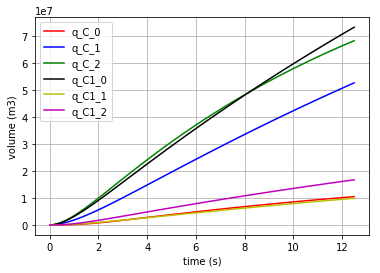

In [7]:
for q, c, label in [(x[:,0],'r', 'q_C_0'), (x[:,1],'b', 'q_C_1'), (x[:,2],'g', 'q_C_2'), (x[:,3],'k', 'q_C1_0'), (x[:,4],'y', 'q_C1_1'), (x[:,5],'m', 'q_C1_2')]:
    fig=plt.plot(t,q,c, label=label)
    plt.xlabel("time (s)")
    plt.ylabel("volume (m3)") #metre3
    plt.legend(loc='upper left')
plt.grid()

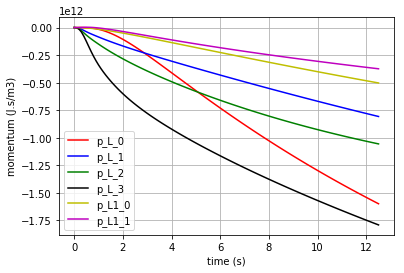

In [10]:
for p, c, label in [(x[:,12],'r', 'p_L_0'), (x[:,13],'b', 'p_L_1'), (x[:,14],'g', 'p_L_2'), (x[:,15],'k', 'p_L_3'), (x[:,16],'y', 'p_L1_0'), (x[:,17],'m', 'p_L1_1')]:
    fig=plt.plot(t,p,c, label=label)
    plt.xlabel("time (s)")
    plt.ylabel("momentum (J.s/m3)") 
    plt.legend(loc='lower left')
plt.grid()